## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') 

### A Little Recap

In [73]:
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HV1       4843 non-null   int64  
 1   IC1       4843 non-null   int64  
 2   IC2       4843 non-null   int64  
 3   IC3       4843 non-null   int64  
 4   IC4       4843 non-null   int64  
 5   IC5       4843 non-null   int64  
 6   AVGGIFT   4843 non-null   float64
 7   TARGET_D  4843 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 302.8 KB


In [75]:
# starting with some EDA
data.describe()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1163.701425,352.831922,401.913690,400.962214,446.035102,16483.862482,11.836754,15.624344
std,1032.104682,171.357547,182.660078,166.681913,176.689128,9499.090544,10.147951,12.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,548.000000,239.000000,283.000000,287.000000,325.000000,11164.000000,7.181818,10.000000
50%,809.000000,318.000000,366.000000,366.000000,411.000000,14377.000000,10.000000,13.000000
75%,1367.500000,427.000000,481.000000,482.500000,531.500000,18819.500000,14.500000,20.000000
max,5982.000000,1500.000000,1500.000000,1394.000000,1394.000000,174523.000000,450.000000,200.000000


In [76]:
# checking for correlations
data_corr = data.corr()
data_corr

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
HV1,1.000000,0.703625,0.739520,0.731628,0.746706,0.737448,0.137374,0.126180
IC1,0.703625,1.000000,0.952263,0.974436,0.928996,0.811115,0.118425,0.118255
IC2,0.739520,0.952263,1.000000,0.954477,0.972286,0.875394,0.134469,0.134289
IC3,0.731628,0.974436,0.954477,1.000000,0.972117,0.829505,0.126843,0.127239
IC4,0.746706,0.928996,0.972286,0.972117,1.000000,0.868960,0.133909,0.136632
IC5,0.737448,0.811115,0.875394,0.829505,0.868960,1.000000,0.135712,0.135409
AVGGIFT,0.137374,0.118425,0.134469,0.126843,0.133909,0.135712,1.000000,0.516725
TARGET_D,0.126180,0.118255,0.134289,0.127239,0.136632,0.135409,0.516725,1.000000


In [77]:
data_corr[(data_corr['IC1'] > 0.8) | (data_corr['IC1'] < -0.8)][['IC1', 'TARGET_D']] # filtering for some analysis

,IC1,TARGET_D
IC1,1.000000,0.118255
IC2,0.952263,0.134289
IC3,0.974436,0.127239
IC4,0.928996,0.136632
IC5,0.811115,0.135409


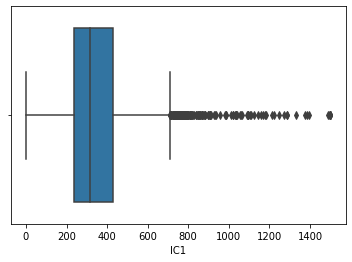

In [78]:
# let's check for outliers
sns.boxplot(x=data['IC1']) # whis is the parameter to choose your threshold, standard is 1.5
plt.show()

In [79]:
# removing outliers
# first we find our interquartile range
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25) # data['IC1'].quantile(0.75)
iqr

188.0

In [80]:
np.percentile(data['IC1'],25)

239.0

In [81]:
# if you don't have your own conception of outlier for the data you are analyzing, 
# the stantard threshold to consider is by adding (upper) or subtracting (lower) 1.5 x IQR
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr
upper_limit, lower_limit

(709.0, -43.0)

In [82]:
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0
...,...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000,25.0
4839,3357,284,455,343,447,24240,11.857143,19.0
4840,700,322,415,356,446,14360,11.333333,10.0
4841,601,206,225,251,289,9801,13.000000,25.0


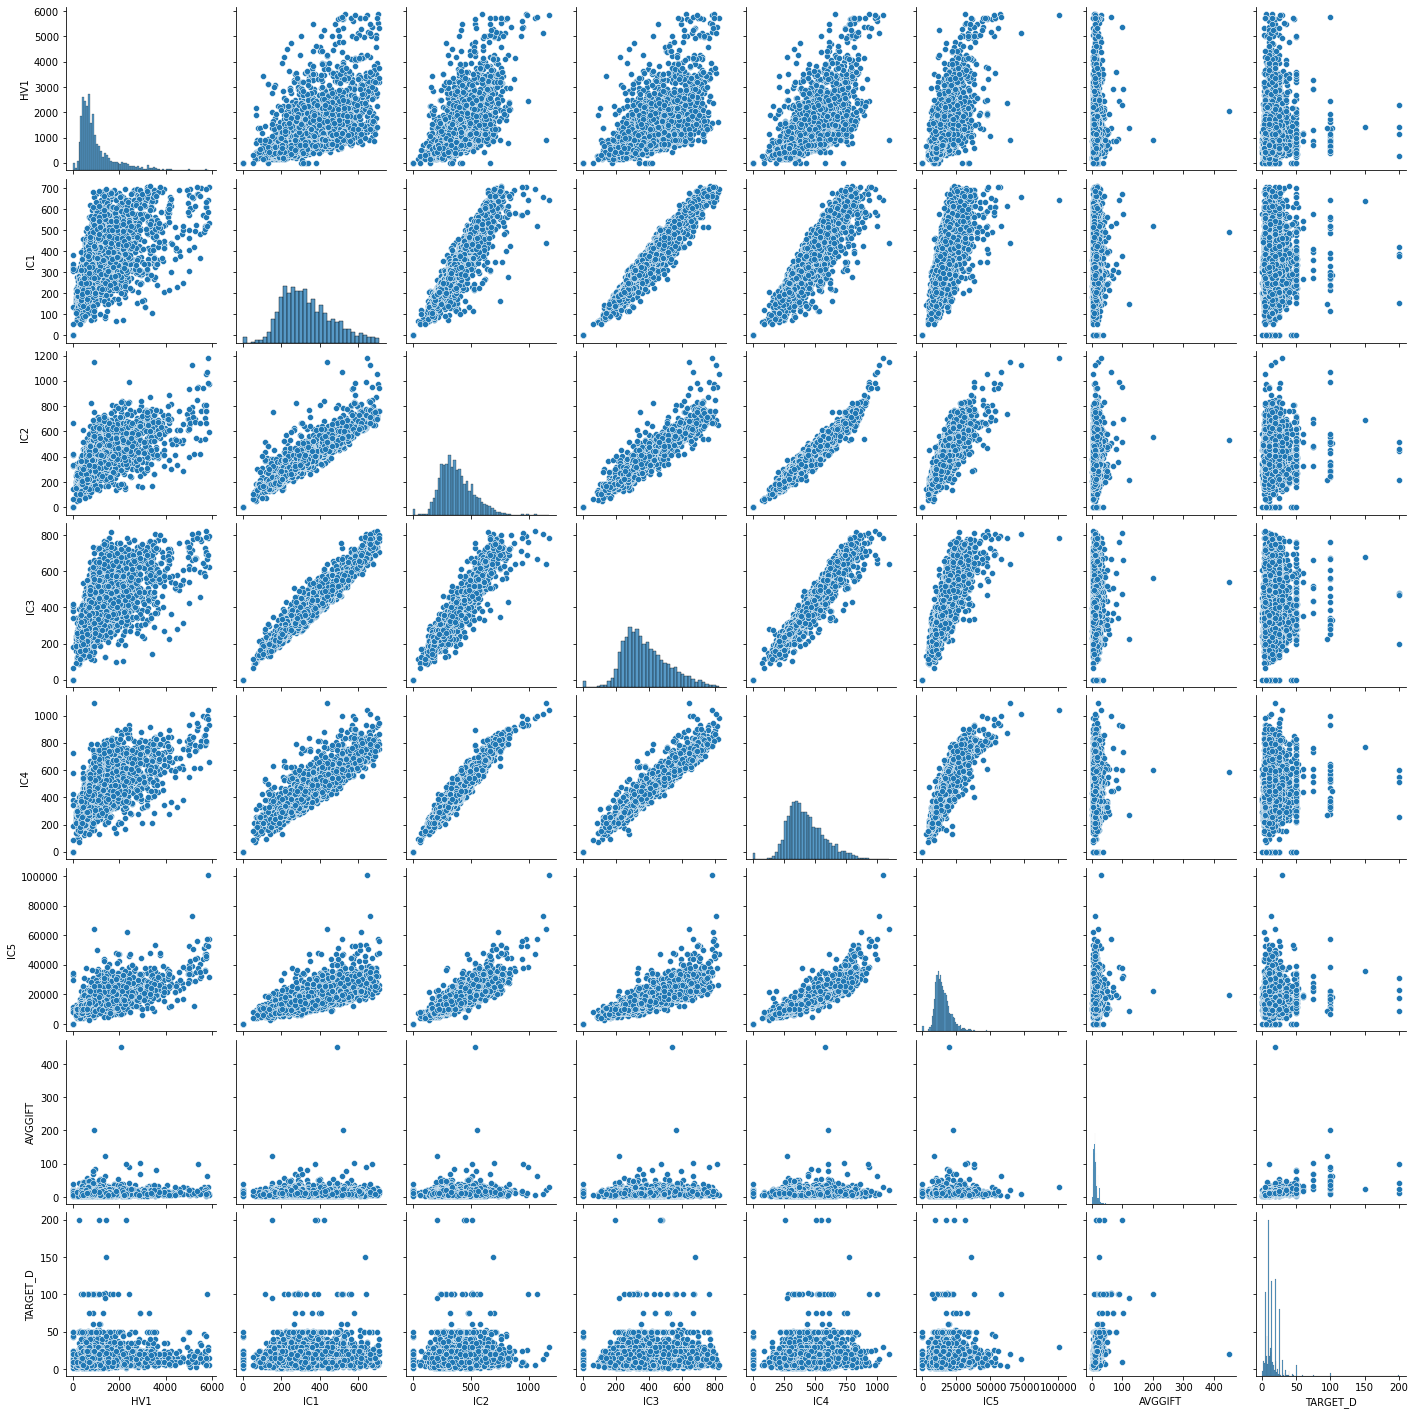

In [83]:
sns.pairplot(data)

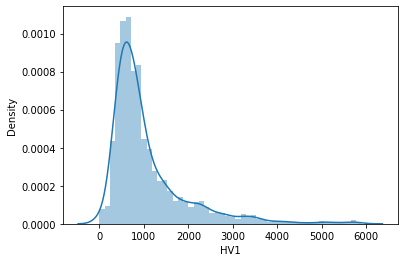

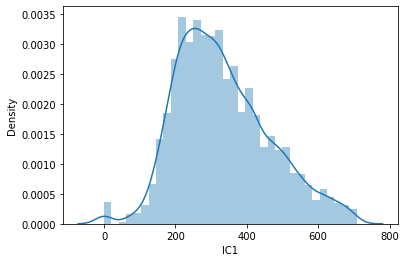

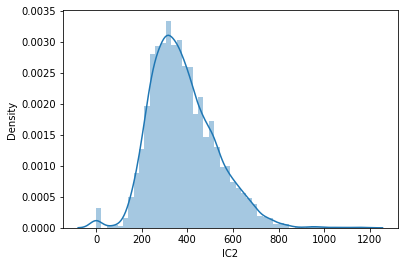

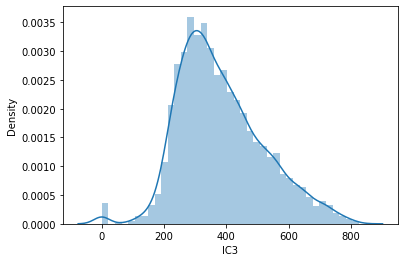

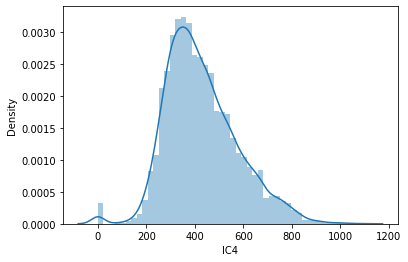

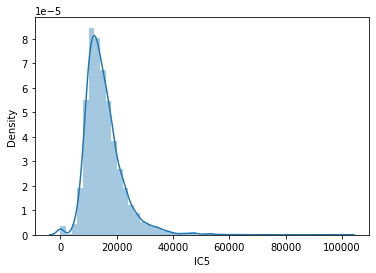

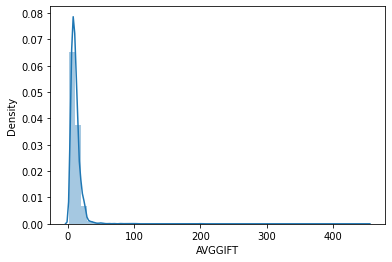

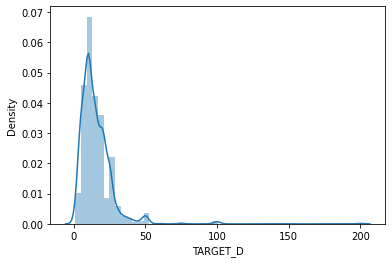

In [84]:
# checking distribution of our data (still part of the EDA)
# the data is skewed (right/positive skew)
for column in data.columns:
    sns.distplot(data[column])
    plt.show()

### Into Normal
A bit of theory [here](https://scottclowe.com/2016-03-12-boxcox-feature-gaussianisation/)

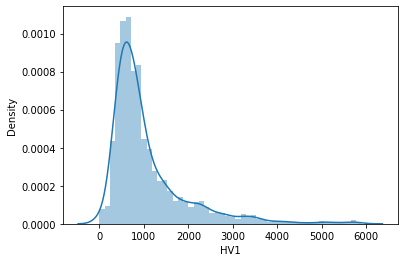

In [85]:
sns.distplot(data['HV1'])
plt.show()

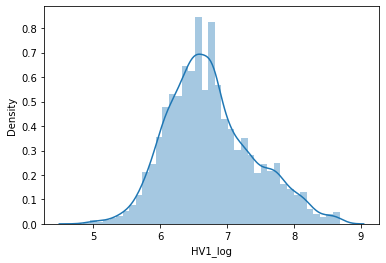

In [87]:
# some techniques to "normalise" your data 

data1 = data.copy()

# we are replacing the -inf values after we take logarithm of 0
# we'll test 2 options (replacing -inf by zero or by the mean of the column after the log transformation)

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

data1['HV1'] = data1['HV1'].apply(log_lmbda)

data1['HV1'] = data1['HV1'].fillna(np.mean(data1['HV1']))

sns.distplot(data1['HV1'])
plt.show()

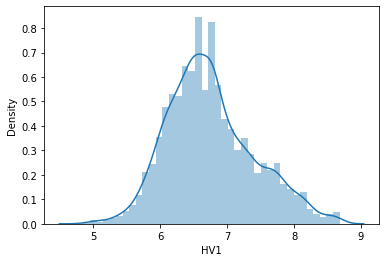

In [88]:
data1 = data.copy()

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

#data1['HV1'] = data1['HV1'].apply(log_transfom_clean)

data1['HV1'] = list(map(log_transfom_clean, data1['HV1']))

data1['HV1'] = data1['HV1'].fillna(np.mean(data1['HV1']))

sns.distplot(data1['HV1'])
plt.show()

<AxesSubplot:xlabel='HV1_log'>

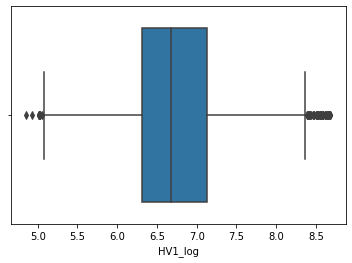

In [67]:
sns.boxplot(data1['HV1'])

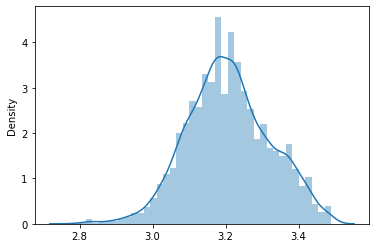

In [89]:
# BoxCox transformation

# Since this is median household income, we can filter out negative values:
# if you do not want to lose this data, replace it with the mean of the column

data1 = data.copy()

data1['HV1'] = np.where(data['HV1']<=0, np.NAN, data['HV1'])

data1['HV1'] = data1['HV1'].fillna(data['HV1'].mean())

transformed_data, _ci = stats.boxcox(data1['HV1'])

sns.distplot(transformed_data)
plt.show()

In [70]:
stats.boxcox(data1['IC1'])

(array([17.31750268, 16.2076329 , 18.01969743, ..., 15.72016709,
        13.30891044, 17.3916895 ]),
 0.30359217984395137)

### More Feature Scaling
Standardizing (mean=0, stdev=1) and Normalizing (rescale between 0 and 1)

In [90]:
y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)

In [91]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [100]:
import pickle

# Normalizing data
transformer = Normalizer() # Normalizer works column wise, so don't use it on the target 
# (X-y split comes first, or else your features will carry information from the target)
transformer.fit(X_num) # you'll always only fit on the trainning data

# When Normalizing with encoded categorical data, you'll lose some information on the categories.
# When Normalizing only numericals, you'll be losing proportion between numericals and encoded categories.

with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X_num)
#pd.DataFrame(x_normalized)
x_normalized.shape

(4670, 7)

In [114]:
# using standard scaler
transformer = StandardScaler() # StandardScaler and MinMax scaler works row wise,
# so make sure you do the train-test split first
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized#.shape
#pd.DataFrame(x_standardized)



array([[ 1.47273428,  0.66879038,  0.46038245, ...,  0.51115923,
        -0.13208803,  0.37582816],
       [-0.65601222,  0.13379081, -0.11990113, ..., -0.29436275,
        -0.55009789, -0.85426035],
       [ 0.18673653,  1.04329008,  0.85667367, ...,  0.78869201,
         0.27201744, -0.41649938],
       ...,
       [-0.42229911, -0.08020902,  0.24100695, ...,  0.12532097,
        -0.16018954, -0.03684243],
       [-0.53627742, -0.96677974, -1.10355255, ..., -0.93742651,
        -0.82745388,  0.1282258 ],
       [-0.17016526,  0.70700464,  1.2812714 , ...,  1.82436312,
         1.5118499 ,  0.61581198]])

<AxesSubplot:ylabel='Density'>

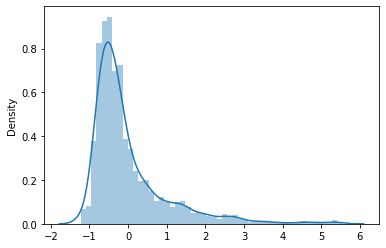

In [115]:
# Also check out min-max scaler
sns.distplot(x_standardized.T[0])

###### IMPORTANT: YOU HAVE TO SCALE THE NEW DATA SO THE MODEL WILL BE ABLE TO GENERATE CORRECT PREDICTIONS; ALSO, IF YOU SCALE YOUR TARGET VARIABLE, YOU HAVE TO UNSCALE IT AFTER THE PREDICTIONS
###### ALSO IMPORTANT: NORMALIZER WORKS COLUMN WISE, WHILE STANDARDSCALER AND MINMAXSCALER WORKS ROW WISE